In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

sns.set(style="whitegrid")


In [2]:
# Cell 2: Load Iris dataset
iris_flower_file = pd.read_csv("/content/IRIS.csv")
iris_flower_file.head(16)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# Cell 3: Check shape, info, description, and null values
print("Shape of dataset:", iris_flower_file.shape)
print("\nDataset Info:\n")
iris_flower_file.info()
print("\nDataset Description:\n", iris_flower_file.describe())
print("\nNull values in each column:\n", iris_flower_file.isnull().sum())


Shape of dataset: (150, 5)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Dataset Description:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.8000

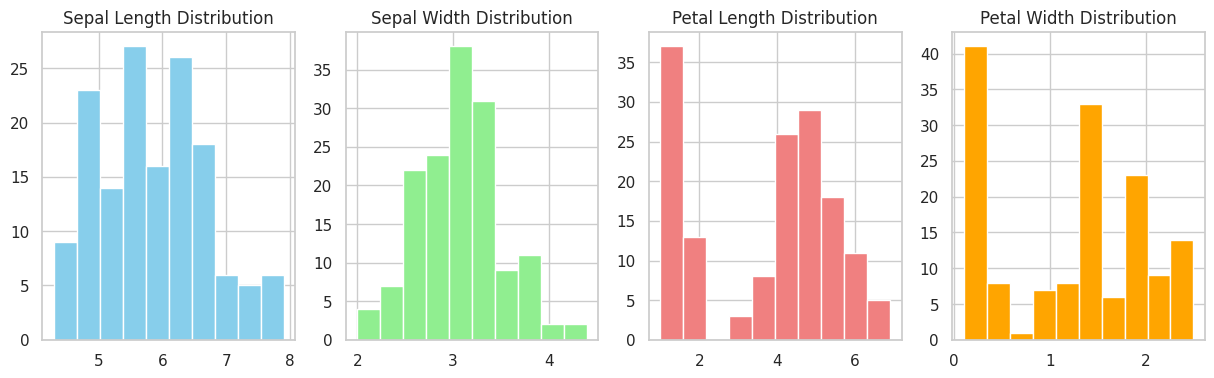

In [4]:
# Cell 4: Histograms for all features
plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
iris_flower_file['sepal_length'].hist(color='skyblue')
plt.title('Sepal Length Distribution')

plt.subplot(1,4,2)
iris_flower_file['sepal_width'].hist(color='lightgreen')
plt.title('Sepal Width Distribution')

plt.subplot(1,4,3)
iris_flower_file['petal_length'].hist(color='lightcoral')
plt.title('Petal Length Distribution')

plt.subplot(1,4,4)
iris_flower_file['petal_width'].hist(color='orange')
plt.title('Petal Width Distribution')

plt.show()


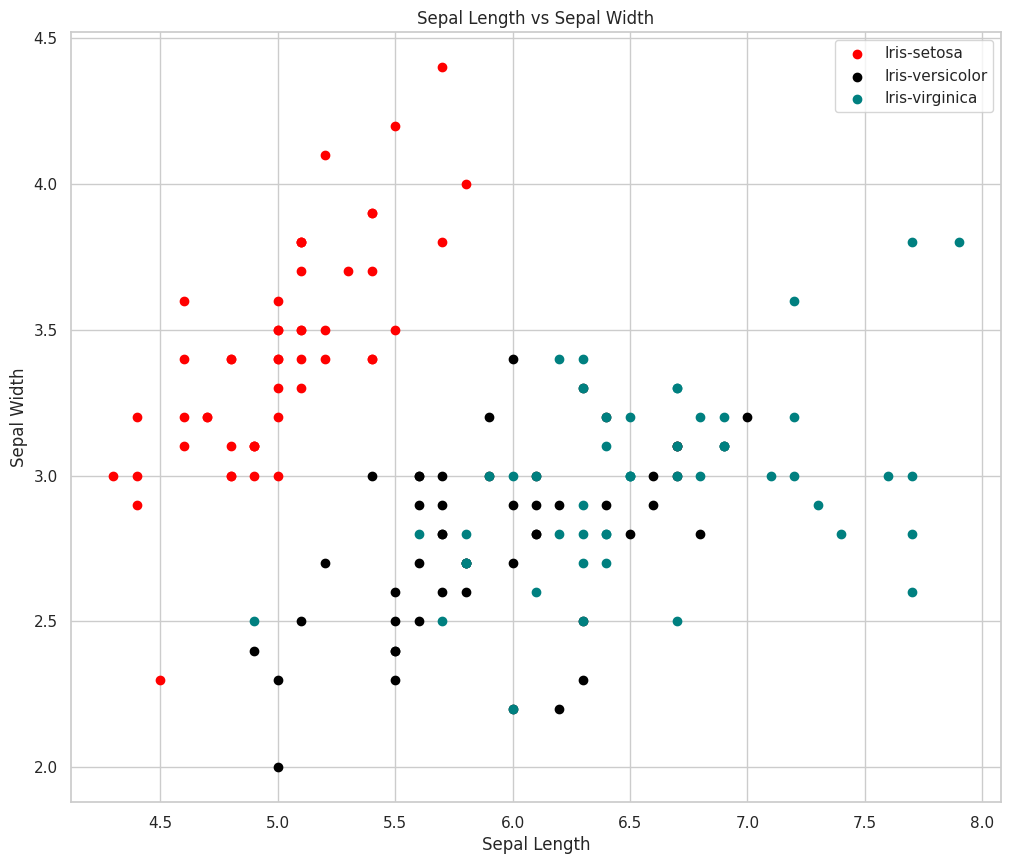

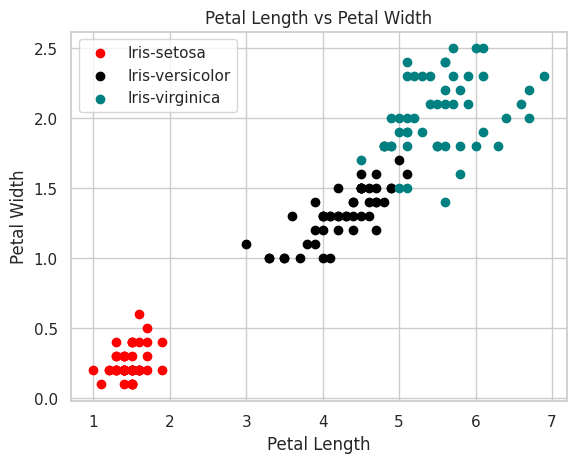

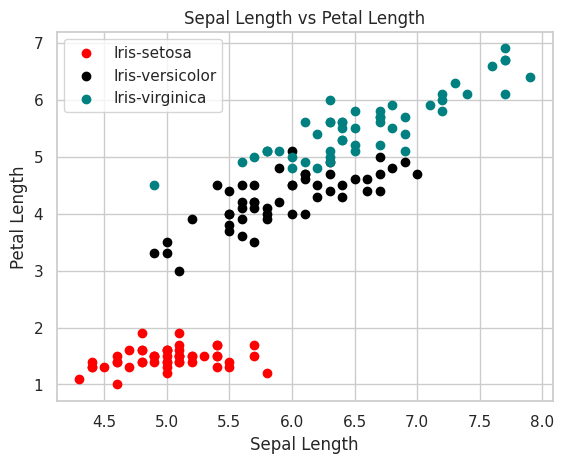

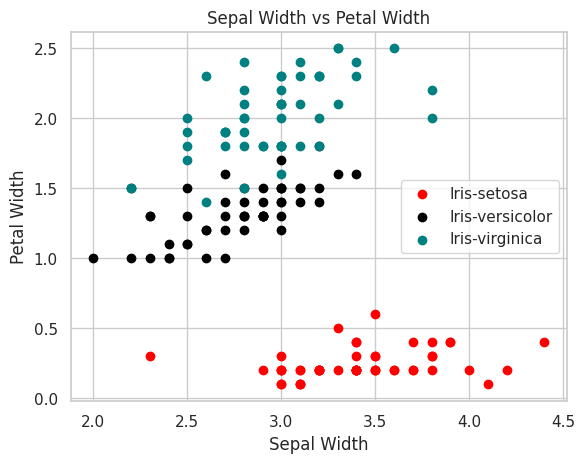

In [5]:
# Cell 5: Scatter plots to visualize species separation
colors = ['red', 'black', 'teal']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

plt.figure(figsize=(12,10))

# Sepal Length vs Sepal Width
for i in range(3):
    x = iris_flower_file[iris_flower_file['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.title("Sepal Length vs Sepal Width")
plt.show()

# Petal Length vs Petal Width
for i in range(3):
    x = iris_flower_file[iris_flower_file['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.title("Petal Length vs Petal Width")
plt.show()

# Sepal Length vs Petal Length
for i in range(3):
    x = iris_flower_file[iris_flower_file['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.title("Sepal Length vs Petal Length")
plt.show()

# Sepal Width vs Petal Width
for i in range(3):
    x = iris_flower_file[iris_flower_file['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.title("Sepal Width vs Petal Width")
plt.show()


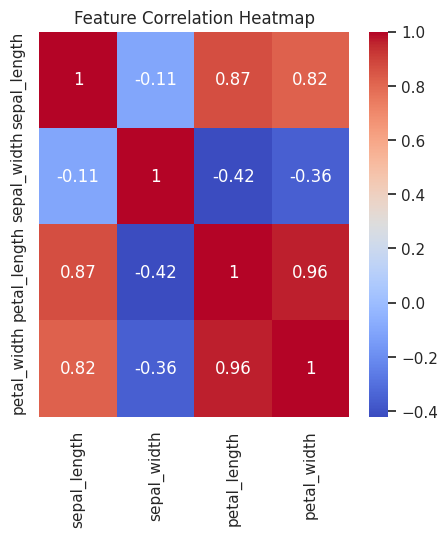

In [6]:
# Cell 6: Correlation heatmap of numeric features
numeric_columns = iris_flower_file.drop(columns='species')
corr = numeric_columns.corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
# Cell 7: Encode species labels
le = LabelEncoder()
iris_flower_file['species'] = le.fit_transform(iris_flower_file['species'])
iris_flower_file.head(16)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [8]:
# Cell 8: Split dataset into features and target
X = iris_flower_file.drop(columns='species')
y = iris_flower_file['species']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Cell 9: Train Logistic Regression, KNN, and Decision Tree models
LR = LogisticRegression(max_iter=200)
LR.fit(X_train, y_train)

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [10]:
# Cell 10: Evaluate model accuracy
LR_accuracy = LR.score(X_test, y_test) * 100
KNN_accuracy = KNN.score(X_test, y_test) * 100
DT_accuracy = DT.score(X_test, y_test) * 100

print(f"Accuracy by Logistic Regression: {LR_accuracy:.2f}%")
print(f"Accuracy by K Nearest Neighbors: {KNN_accuracy:.2f}%")
print(f"Accuracy by Decision Tree Classifier: {DT_accuracy:.2f}%")


Accuracy by Logistic Regression: 100.00%
Accuracy by K Nearest Neighbors: 100.00%
Accuracy by Decision Tree Classifier: 100.00%
